In [1]:
import json
from google_play_scraper import Sort, reviews_all
from datetime import datetime

In [2]:
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

In [3]:
result = reviews_all(
    'com.wework.ondemand',
    sleep_milliseconds=0,
    lang='en',
    country='us',
    sort=Sort.MOST_RELEVANT,
)

In [4]:
# Specify the file path where you want to save the results
file_path = 'wework_review.json'

# Write the results to the JSON file using the custom encoder
with open(file_path, 'w', encoding='utf-8') as file:
    json.dump(result, file, ensure_ascii=False, indent=2, cls=DateTimeEncoder)

In [5]:
import pandas as pd

data = pd.read_json(file_path)
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,423145d6-149f-4b7b-9c52-ae0cc007bcb1,J Dugald,https://play-lh.googleusercontent.com/a-/ALV-U...,I applaud the minimalism but it's so difficult...,2,47,2.36.1,2023-05-28T23:59:42,None,None,2.36.1
1,86dd1821-3bb5-46d5-825e-24f843df3e7e,Mark Falinski,https://play-lh.googleusercontent.com/a-/ALV-U...,This is the first one star review I've ever gi...,1,253,2.2.3,2022-02-22T20:06:35,None,None,2.2.3
2,fe601b06-e0de-4765-ae6f-ccefa56b0add,Michelle Snay,https://play-lh.googleusercontent.com/a-/ALV-U...,It shows all private spaces as unavailable. Wh...,1,86,1.6.0,2021-04-18T19:07:48,None,None,1.6.0
3,90c209c7-bfef-42e5-b88f-bf18013225b6,Philip Struthers,https://play-lh.googleusercontent.com/a-/ALV-U...,"Great app, simple, clean, and effective. Only ...",4,15,2.55.1,2023-10-26T06:44:36,None,None,2.55.1
4,621d6a75-20f8-422b-a309-e7d38636e1b7,Ryan Crawford-Emery,https://play-lh.googleusercontent.com/a/ACg8oc...,Not working! Doesn't have Google account login...,1,2,2.55.2,2023-12-06T02:17:45,None,None,2.55.2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              278 non-null    object
 1   userName              278 non-null    object
 2   userImage             278 non-null    object
 3   content               278 non-null    object
 4   score                 278 non-null    int64 
 5   thumbsUpCount         278 non-null    int64 
 6   reviewCreatedVersion  228 non-null    object
 7   at                    278 non-null    object
 8   replyContent          42 non-null     object
 9   repliedAt             42 non-null     object
 10  appVersion            228 non-null    object
dtypes: int64(2), object(9)
memory usage: 24.0+ KB


In [7]:
data.drop(columns=[
    'reviewId',
    'userImage',
    'userName',
    'replyContent',
    'repliedAt',
    'appVersion'
], inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               278 non-null    object
 1   score                 278 non-null    int64 
 2   thumbsUpCount         278 non-null    int64 
 3   reviewCreatedVersion  228 non-null    object
 4   at                    278 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.0+ KB


In [9]:
data.reset_index(inplace=True)
data.head()

,index,content,score,thumbsUpCount,reviewCreatedVersion,at
0,0,I applaud the minimalism but it's so difficult...,2,47,2.36.1,2023-05-28T23:59:42
1,1,This is the first one star review I've ever gi...,1,253,2.2.3,2022-02-22T20:06:35
2,2,It shows all private spaces as unavailable. Wh...,1,86,1.6.0,2021-04-18T19:07:48
3,3,"Great app, simple, clean, and effective. Only ...",4,15,2.55.1,2023-10-26T06:44:36
4,4,Not working! Doesn't have Google account login...,1,2,2.55.2,2023-12-06T02:17:45


In [10]:
rating_df = data.groupby(by='score').agg({
    'index': 'nunique'
}).reset_index()

rating_df.head()

,score,index
0,1,153
1,2,24
2,3,21
3,4,18
4,5,62


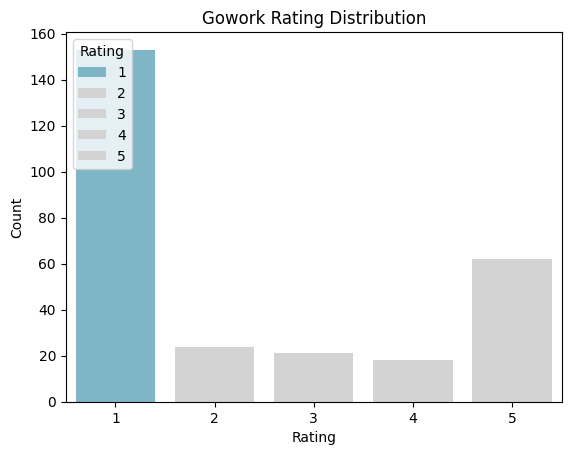

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'score' column in your DataFrame represents the ratings
labels = rating_df['score']
sizes = rating_df['index']

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
# Create a bar plot using seaborn
sns.barplot(x=labels, y=sizes, palette=colors, hue=labels)

# Adding a title
plt.title('Gowork Rating Distribution')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.legend(title='Rating', loc='upper left')

# Display the bar plot
plt.show()


In [12]:
pd.set_option('display.max_colwidth', None)
data.sort_values(by='thumbsUpCount', ascending=False)

most_thumbs_df = data[['content', 'score', 'thumbsUpCount']].sort_values(by='thumbsUpCount', ascending=False)

most_thumbs_df[most_thumbs_df.thumbsUpCount != 0].head(10)

,content,score,thumbsUpCount
1,"This is the first one star review I've ever given. I can't even log in to the app in the first place. I have no problem accessing the WeWork website on my computer or on my phone's browser. But logging in through the app is impossible. I have sent in a ticket to get it fixed, but it's been 3 weeks and the problem still isn't resolved. In fact, they stopped responding to my emails last week. If WeWork can't even fix a simple little bug, I have basically no faith that this app will get better",1,253
2,"It shows all private spaces as unavailable. When you click into the side, it shows it's available. When you try to reserve, you get a hard error I can't tell if something is actually available or the app is just broken. Can't reserve any private space. I should note I've tried this on an android and iphone. Neither will allow me to book a space.",1,86
7,"WeWork is lovely, this app is meh. Booking rooms and desks is tedious. When I try to filter for desks to book tomorrow, it shows all the unavailable locations first. There is also no text search for locations, you just have to scroll until you find what you want and the ordering is always changing. Finally there's no way to book a set of desks for a team, seems like a common enough use case.",3,79
13,"Terrible design and experience. Who books a we work location for the same day at 7pm? What a terrible default. Nevermind that the app scheduling shows 'today' and 'tomorrow' instead of just showing dates, and that to upgrade your account you have to call them and can't do it in the app. It's an app with terrible UI from a company who doesn't seem to want your money, terribly innovative.",2,57
11,"The new app version is much harder to use that the previous. Particularly booking desks for particular dates used to be simple and now is a tedious process, especially if booking multiple dates. The date picker using a scrolling UI picker is terrible and the insane amount of navigation/confirmation (6 actions to book a desk). And then being taken back to the main screen (re-select desk instead of room) and go through 6 steps again. Also no indication of whether I already booked a desk that day.",1,57
10,"Amazingly, this new app is even worse than the old app. It currently is broken on sign-in for me, but even when I could get into it it's user interface was awful - lots of fiddly controls that were easy to get wrong on the first attempt. Ridiculous to make me go through the procedure of installing a completely fresh app for this. The poor quality of this app makes me less likely to go into the office on some days.",1,56
34,"This is not flexible. You can only book day passes for coworking spaces. You can't just check in and out and pay for what you use like in other coworking spaces such as Work.Life. And the day passes are so expensive. There many more affordable, more flexible options out there that offer the same, if not better, facilities.",1,49
27,"App doesn't work. I simply wanted an idea of pricing. The website forces you to check via the mobile app, but the back end services appear to be broken. Nothing loads fully. Pretty bad look for new potential customer intake.",1,49
0,I applaud the minimalism but it's so difficult to upgrade without sending a request. I would just like the same visibility using on a laptop as on the mobile app. I feel like that wouldn't completely derail the aesthetic. Having to bounce back and forth between the two to just purchase a membership is making me lose motivation for what already seems like a bloated monthly membership fee.,2,47
44,I can't book. In checkout at invoice info when I write my address but the options showed are not clickable and this field is required that's why I can't book. I'm really lost because I need some place to work on demand and I trusted on We Work...,1,35


In [17]:
lowest_score_df = most_thumbs_df.sort_values(by='score', ascending=True)
lowest_score_df[lowest_score_df.score <= 3]

,content,score,thumbsUpCount
1,"This is the first one star review I've ever given. I can't even log in to the app in the first place. I have no problem accessing the WeWork website on my computer or on my phone's browser. But logging in through the app is impossible. I have sent in a ticket to get it fixed, but it's been 3 weeks and the problem still isn't resolved. In fact, they stopped responding to my emails last week. If WeWork can't even fix a simple little bug, I have basically no faith that this app will get better",1,253
160,I can't login nor sign up. Please fix it,1,2
239,Unusable.,1,2
28,Another BS Millennial mobile app. What is the point of this app if I can use a web browser that is a 1000 times better and faster?,1,2
170,keeps being up locations in South America mid way through searching/booking in Sydney Australia,1,2
...,...,...,...
267,No problem 😊,3,2
32,The day I can use my phone to enter rather than another plastic card is the day I will give the app 5 stars,3,0
51,It opens or appears to open in a browser window. I could login from a browser for that. I don't want a map of the surrounding area when I login into my office portal. I could use Maps for that,3,2
35,Downloaded the app a while ago but only just updated and signed up. First time of use and the locations will not open. Have tried several locations and resetting the app. My internet is good. Galaxy S22 Ultra.,3,10


In [13]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
# Apply split() to each cell in the 'content' column
split_it = most_thumbs_df['content'].apply(lambda x: x.split())

# Flatten the list of lists
flat_list = [word for sublist in split_it for word in sublist]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in flat_list if word.lower() not in stop_words]

# Use Counter to count occurrences of each word
word_counter = Counter(filtered_words)

# Get the most common words
most_occur = word_counter.most_common()
most_occur_df = pd.DataFrame(most_occur, columns=['Word', 'Count'])
most_occur_df.head(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbint\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word,Count
0,app,98
1,book,30
2,work,27
3,use,25
4,can't,22
5,sign,22
6,Can't,19
7,WeWork,18
8,day,18
9,good,18


In [14]:
version_score_df = data.groupby(by=['reviewCreatedVersion']).agg({
    'score': 'mean',
    'index': 'nunique'
}).sort_values(by=['reviewCreatedVersion', 'score'], ascending=False)

version_score_df

,score,index
reviewCreatedVersion,,
2.9.1,2.000000,5
2.7.1,3.000000,3
2.6.1,2.200000,5
2.6.0,1.500000,6
2.55.2,2.666667,6
...,...,...
1.15.6,1.000000,3
1.14.1,2.500000,10
1.13.2,4.000000,2
